## **Understanding the problem at Hand**

When you're planning to buy an used car, deciding whether the car is worth the advertised price or not is a daunting task. Several factors contribute to the price of an used car like model, make, mileage, year, etc., amongst others. Even from the seller's point of view, deciding the price at which he/she wants to price the car is a dilema.

We've been contacted by an automobile consulting company to understand the factors on which the pricing of the car depends.

Specifically, they want to understand the factors affecting the pricing of cars.

1. Which variables are significant in predicting the price of a car
2. How well those variables describe the price of a car

The task at hand for us is to predict the price of an used car appropriately based on the existing data using machine learning algorithms. We need to use our data exploration skills and find out the importance of each variable in predicting the price of an used car


In [30]:
#importing the necessary packages
import pandas as pd
import string
import plotly.express as px
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import matplotlib.style

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from scipy.stats import zscore
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.api as sm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import StandardScaler


warnings.filterwarnings("ignore")
%matplotlib inline


**Now that we've set up everything, let's read the dataset**

**Let's take a look at the description of each of the features we have**

In [31]:
#Reading the data dictionary file to understand the features that we've at hand.
data_dict=pd.read_excel('data dictionary.xlsx',index_col = 0)
print(data_dict.to_string())

                                                                                Description
Attribute                                                                                  
Name                                                         The brand and model of the car
Location           The location in which the car is being sold or is available for purchase
Year                                                       The year or edition of the model
Kilometers_Driven     The total kilometers driven in the car by the previous owner(s) in KM
Fuel_Type                                                  The type of fuel used by the car
Transmission                                       The type of transmission used by the car
Owner_Type                         Whether the ownership is Firsthand, Second hand or other
Mileage                    The standard mileage offered by the car company in kmpl or km/kg
Engine                                          The displacement volume of the e

 **Now that we've got a basic understanding of what each feature means, let's dive into the data**

In [32]:
#Reading the train and test data into a pandas dataframe
train_data = pd.read_csv("train.csv", index_col = False)
test_data = pd.read_csv("test.csv", index_col = False)
org_data = train_data.copy()

In [33]:
print("Shape of Train data is: ",train_data.shape)
print("Shape of Test data is: ",test_data.shape)

Shape of Train data is:  (6019, 13)
Shape of Test data is:  (1234, 12)


*    In the train data, We've the records of 6019 cars along with 13 attributes describing them.
*    In the test data we have 1234 observations with 12 attributes and price is the attribute we need to predict. 

### **Now that we've got a basic understanding of what each feature means, let's dive into the data**

In [34]:
train_data.head(5)

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp   5.00   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp   5.00   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp   5.00   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp   7.00   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp   5.00   

   New_Price  Price  
0        NaN   1.75  
1        NaN  12.50  
2  8.61 Lakh   4.50  
3        NaN   6.00  
4        NaN  17.74

In [35]:
test_data.head()

Name    Location  Year  \
0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3                       Toyota Etios Liva GD   Hyderabad  2012   
4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0              40929       CNG       Manual      First  32.26 km/kg   998 CC   
1              54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2              34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3             139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4              29000    Petrol       Manual      First    18.5 kmpl  1197 CC   

       Power  Seats   New_Price  
0   58.2 bhp   4.00         NaN  
1   47.3 bhp   5.00         NaN  
2  147.8 bhp   7.00  25.27 Lakh  
3   null bhp   5.00         NaN  
4  82.85 bhp   5.00         NaN

In [36]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [37]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
 11  New_Price          182 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 115.8+ KB


#####**Observation:** 

*    Price is our 'target' variable, therefore it is present in train dataset but not in the test dataset.
*   Year, Kilometers_Driven, Seats, Price are the numerical data from our dataset
*   Although Engine and Power are of object type, they can be converted to numerical if we do some preprocessing
*   In the train dataset, some of the features have less than 6019 "Non-Null count" implying that there are missing values in those columns(6019 is the total no. of observations)




Now, let us find out if we have any duplicate values in our dataset 

In [38]:
train_data.duplicated().sum()

0

This shows that we don't have any duplicate observations in our dataset.

### **Unique Values Analysis**

Let us analyse the  number of unique values in each of our attributes

In [39]:
unique_counts = []
for col in train_data.columns:
    unique_counts.append((col, train_data[col].nunique()))
unique_counts = sorted(unique_counts, key=lambda x: x[1],reverse = True)
print("No of unique values in each column are as follows:(In Descending order)\n")
for col,nunique in unique_counts:
    print(f"{col}: {nunique}: {round(nunique/6019*100,2)}%")

No of unique values in each column are as follows:(In Descending order)

Kilometers_Driven: 3093: 51.39%
Name: 1876: 31.17%
Price: 1373: 22.81%
New_Price: 540: 8.97%
Mileage: 442: 7.34%
Power: 372: 6.18%
Engine: 146: 2.43%
Year: 22: 0.37%
Location: 11: 0.18%
Seats: 9: 0.15%
Fuel_Type: 5: 0.08%
Owner_Type: 4: 0.07%
Transmission: 2: 0.03%


### Missing Value Analysis

In [40]:
def get_missing_data_details(df):
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False,)
    total = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
    missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing = missing[missing["Percent"]>0]
  
    plt.figure(figsize = (5,5))
    sns.barplot(missing["Percent"],missing.index)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percentage', fontsize=15)
    plt.title('Missing Data %', fontsize=15)

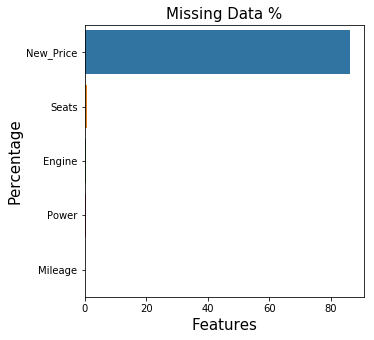

In [41]:
get_missing_data_details(train_data)

In [42]:
for col in train_data.columns:
    if train_data[col].isnull().sum()!=0:
        print(f"{col}: {train_data[col].isnull().sum()}: {round(train_data[col].isnull().mean()*100,2)}%")

Mileage: 2: 0.03%
Engine: 36: 0.6%
Power: 36: 0.6%
Seats: 42: 0.7%
New_Price: 5195: 86.31%



**Observations**

*   Columns other than New_Price have very less amount of missing values which need to be imputed appropriately.
*   New_Price has more than 86% values missing in it. Most of the times, such columns can be safely removed. Let's see what the data dictionary says about this variable.


In [43]:
data_dict.loc['New_Price']

Description    Price of new model
Name: New_Price, dtype: object

*   Data dictionary defines New_Price as the price of a new model.
*   Although this could be an important variable, having to deal with 86% of missing data adds a lot of noise to our dataset. So, We have to remove this variable



In [44]:
pd.options.display.float_format = '{:.2f}'.format

In [45]:
train_data.describe(include='all')

Name Location    Year  Kilometers_Driven Fuel_Type  \
count                     6019     6019 6019.00            6019.00      6019   
unique                    1876       11     NaN                NaN         5   
top     Mahindra XUV500 W8 2WD   Mumbai     NaN                NaN    Diesel   
freq                        49      790     NaN                NaN      3205   
mean                       NaN      NaN 2013.36           58738.38       NaN   
std                        NaN      NaN    3.27           91268.84       NaN   
min                        NaN      NaN 1998.00             171.00       NaN   
25%                        NaN      NaN 2011.00           34000.00       NaN   
50%                        NaN      NaN 2014.00           53000.00       NaN   
75%                        NaN      NaN 2016.00           73000.00       NaN   
max                        NaN      NaN 2019.00         6500000.00       NaN   

       Transmission Owner_Type    Mileage   Engine   Power   Seats  \
count          6019       6019       6017     5983    5983 5977.00   
unique            2          4        442      146     372     NaN   
top          Manual      First  18.9 kmpl  1197 CC  74 bhp     NaN   
freq           4299       4929        172      606     235     NaN   
mean            NaN        NaN        NaN      NaN     NaN    5.28   
std             NaN        NaN        NaN      NaN     NaN    0.81   
min             NaN        NaN        NaN      NaN     NaN    0.00   
25%             NaN        NaN        NaN      NaN     NaN    5.00   
50%             NaN        NaN        NaN      NaN     NaN    5.00   
75%             NaN        NaN        NaN      NaN     NaN    5.00   
max             NaN        NaN        NaN      NaN     NaN   10.00   

         New_Price   Price  
count          824 6019.00  
unique         540     NaN  
top     63.71 Lakh     NaN  
freq             6     NaN  
mean           NaN    9.48  
std            NaN   11.19  
min            NaN    0.44  
25%            NaN    3.50  
50%            NaN    5.64  
75%            NaN    9.95  
max            NaN  160.00

**Observations:**
*   Out of 11 different locations, We can see that more than 13%(790) of observations are located in "Mumbai".
*   No of kilometers driven ranges from 171 to 6.5 lakh kilometres with atleast 75% values less than 73000, indicating that there might be some outliers
*   Fuel type of more than 53%(3205) Engines is Diesel.
*   Approximately 70%(4299) of the cars are manual transmission cars.
*   Furthermore, we can see that about 81% of cars are "first owned" 
*   The min no of seats is 0 - indicating an error in our data, as a 'zero seater' car seems highly improbable to exist.
* Average no of seats in a car is 5 and the maximum number of seats are 10
*   We can also observe that Diesel engines are predominantly found in our dataset
*   Price of the car ranges from 44,000 to 1.6 Crores with atleast 75% values less than 9.95 lakhs - outlier indication again



### **Tweaking the Dataset to find more interesting patterns**
*    *We can see that **Year** is considered a **continuous variable**. Let's **convert** it to a **categorical variable** to get a better summary.*
*    *As some of the cars are run on **gas(CNG, LPG)**, We see that Mileage for those cars is recorded in **"km/kg"** where as **petrol/diesel** cars have their mileage in **kmpl**. Let's see if we can convert **km/kg** into **kmpl** and find anything interesting after we make it a numerical value.*
*   *Although we have only **824 non null observations** in the **New Price** column, they're currently in string format. Let's see if we can **convert them to numbers** and derive any interesting value out of that.*
*   Although **'Mahindra XUV500 W8 2WD'** is the car with most no of sales, it's not so significant as it is less than 1%(49) of total sales. 
*   So, from the **'Name'** variable, we can try to derive the Manufacturer of each car i.e., the brand name and pursue deeper.



### **Let's try converting those variables appropriately to see if there's anything interesting lurking beyond the values**

In [46]:
#This function extracts the string part from the values and returns a distinct set of those values
def analyse_columnwise_data(data):
    res = data.str.findall('[a-zA-Z]+',)
    res = [x[0] for x in res if x is not np.nan ]
    return set(res)
  
def get_brand(s):
    return s.split()[0]

def get_model(s):
    return s.split()[1]

In [47]:
train_data['Brand'] = train_data['Name'].apply(get_brand)
train_data['Model'] = train_data['Name'].apply(get_model)

In [48]:
analyse_columnwise_data(train_data['New_Price'])

{'Cr', 'Lakh'}

In [49]:
analyse_columnwise_data(train_data['Mileage'])

{'km', 'kmpl'}

In [50]:
analyse_columnwise_data(train_data['Engine'])

{'CC'}

### From the above, we can see:
  
*   Price has numeric values which might be lakhs or crores. Similarly,
*   Mileage has km/kg and kmpl as units.
*   Enginee has only 'CC' attached at the end of it.

So, we need to deal with these columns accordingly and convert the values

In [51]:
#This function removes the string part from the new_price values and converts them into float. 
def convert_new_price(s):
    if type(s) == str:
        s = s.lower()
        if "lakh" in s: #If the value is in lakhs, we're removing the non-numeric part and converting it into float value
            s = s.strip("lakh")
            s = float(s)
        elif "cr" in s: #If the value is in crores, after removing the non-numeric part, we're converting it into lakhs by multiplying it with 100
            s = s.strip("cr")
            s = float(s)*100
            return s

In [52]:
#This function removes the string part from the Mileage values and converts them into float. 
def adjust_mileage(s):
    if type(s) == str:
        s = s.lower()
        if 'kmpl' in s:
            s = s.strip('kmpl')
        if 'km/kg' in s:
            s = s.strip('km/kg')
            s = float(s)*1.8 #converting km/kg into kmpl assuming 1kg = 1.8 litres of LPG/CNG
    return s

In [53]:
train_data.describe(include='all')#converting Year to string
train_data['Year_converted'] = train_data['Year'].astype('str')
train_data['Engine_converted'] = train_data['Engine'].str.strip('CC').astype('float') 

#converting Mileage to numeric value
train_data['Mileage_converted'] = train_data['Mileage'].apply(adjust_mileage) #removes the non numeric part of the values
train_data['Mileage_converted'] = train_data['Mileage_converted'].astype('float')

train_data['Power'] = train_data['Power'].str.strip("bhp")
train_data['Power'] = pd.to_numeric(train_data['Power'],errors='coerce')

#Converting New Price value into numeric value appropriately
train_data['New_Price_converted'] = train_data['New_Price'].apply(convert_new_price) 

In [54]:
train_data.describe(include='all')

Name Location    Year  Kilometers_Driven Fuel_Type  \
count                     6019     6019 6019.00            6019.00      6019   
unique                    1876       11     NaN                NaN         5   
top     Mahindra XUV500 W8 2WD   Mumbai     NaN                NaN    Diesel   
freq                        49      790     NaN                NaN      3205   
mean                       NaN      NaN 2013.36           58738.38       NaN   
std                        NaN      NaN    3.27           91268.84       NaN   
min                        NaN      NaN 1998.00             171.00       NaN   
25%                        NaN      NaN 2011.00           34000.00       NaN   
50%                        NaN      NaN 2014.00           53000.00       NaN   
75%                        NaN      NaN 2016.00           73000.00       NaN   
max                        NaN      NaN 2019.00         6500000.00       NaN   

       Transmission Owner_Type    Mileage   Engine   Power   Seats  \
count          6019       6019       6017     5983 5876.00 5977.00   
unique            2          4        442      146     NaN     NaN   
top          Manual      First  18.9 kmpl  1197 CC     NaN     NaN   
freq           4299       4929        172      606     NaN     NaN   
mean            NaN        NaN        NaN      NaN  113.25    5.28   
std             NaN        NaN        NaN      NaN   53.87    0.81   
min             NaN        NaN        NaN      NaN   34.20    0.00   
25%             NaN        NaN        NaN      NaN   75.00    5.00   
50%             NaN        NaN        NaN      NaN   97.70    5.00   
75%             NaN        NaN        NaN      NaN  138.10    5.00   
max             NaN        NaN        NaN      NaN  560.00   10.00   

         New_Price   Price   Brand  Model Year_converted  Engine_converted  \
count          824 6019.00    6019   6019           6019           5983.00   
unique         540     NaN      31    212             22               NaN   
top     63.71 Lakh     NaN  Maruti  Swift           2014               NaN   
freq             6     NaN    1211    353            797               NaN   
mean           NaN    9.48     NaN    NaN            NaN           1621.28   
std            NaN   11.19     NaN    NaN            NaN            601.36   
min            NaN    0.44     NaN    NaN            NaN             72.00   
25%            NaN    3.50     NaN    NaN            NaN           1198.00   
50%            NaN    5.64     NaN    NaN            NaN           1493.00   
75%            NaN    9.95     NaN    NaN            NaN           1984.00   
max            NaN  160.00     NaN    NaN            NaN           5998.00   

        Mileage_converted  New_Price_converted  
count             6017.00                17.00  
unique                NaN                  NaN  
top                   NaN                  NaN  
freq                  NaN                  NaN  
mean                18.35               134.88  
std                  5.37                33.25  
min                  0.00               100.00  
25%                 15.26               106.00  
50%                 18.19               128.00  
75%                 21.10               140.00  
max                 60.37               230.00

**Observations:**
*  The brand **Maruti** is the most sold car brand, while **swift** model is the mostly sold car model.
*   More than 13%(797) of cars were sold in the year 2014 based on the 'new_year' column.
* The most repeated value for Engine is 1197 CC. 
* We can also see that atleast 75% of Engines are less than 1984 CC, with maximum value being 5988 CC. This indicates probable outliers exist in this column. 
*   We can see that there're 22 unique values here meaning we've 22 years of data. Combining this to the fact that min and max values are 1998 and 2019, we can figure that we've car models manufactured across 22 years, from 1998 to 2019.
*   In the new price, we can see that the average new price is 23.08 lakhs. 
*   Although the max value is 230L, we can see that atleast 75% of the values are less than 26.56L.
*   The average mileage is 18.35 kmpl while max mileage is 60.37 kmpl and minimum is 0 kmpl - which seems to be an error in the data and we need to handle it.





# **Univariate Analysis**


In [143]:
numerical = ['Kilometers_Driven', 'New_Price_converted', 'Mileage_converted', 'Engine_converted','Power','Year','Price']
categorical = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats','Year_converted','Brand','Model']

In [56]:
# Looking at the unique values of Categorical Features
print(train_data['Location'].unique())
print(train_data['Fuel_Type'].unique())
print(train_data['Transmission'].unique())
print(train_data['Owner_Type'].unique())


['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


In [57]:
#This class is used to style our output in various formats 
class style:
#These are the ANSI escape sequences to set Graphics in our output
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   BLINK = '\033[5m'
   END = '\033[0m'

### Now, let us perform analysis using various numerical and graphical techniques on each of our variables

In [58]:
def univariate_analysis_categorical(cat, i):
    print(f"\t\t{style.BOLD}Univariate Analysis of {cat}")
    print(f"-----------------------------------------------------------{style.END}")
    print(f"{i+1}. No of unique values in {style.BOLD}{cat}{style.END} are: {train_data[cat].nunique()}. \nThe distribution is as follows:")
    print(f"{style.BOLD}{cat}{style.END}\n{train_data[cat].value_counts()}\n")
    vc = train_data[cat].value_counts()
    if len(vc.index)<=5:
        g = sns.countplot(x=cat, data=train_data, palette = 'pastel', order = train_data[cat].value_counts().index)
    elif len(vc.index)>5 and len(vc.index)<=15:
        g = sns.countplot(y=cat, data=train_data, palette = 'pastel', order = train_data[cat].value_counts().index)
    elif len(vc.index)>15:
        g = sns.countplot(x=cat, data=train_data, palette = 'pastel',order = train_data[cat].value_counts().index)
        g.set_xticklabels(labels = g.get_xticklabels(), rotation = 90)
    plt.show()
    print("\t")

		Univariate Analysis of Location
-----------------------------------------------------------
1. No of unique values in Location are: 11. 
The distribution is as follows:
Location
Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64



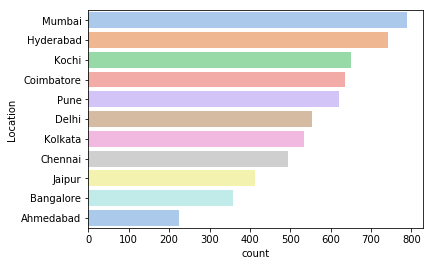

	
		Univariate Analysis of Fuel_Type
-----------------------------------------------------------
2. No of unique values in Fuel_Type are: 5. 
The distribution is as follows:
Fuel_Type
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64



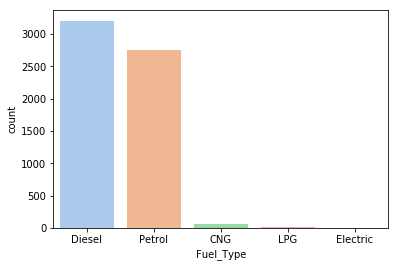

	
		Univariate Analysis of Transmission
-----------------------------------------------------------
3. No of unique values in Transmission are: 2. 
The distribution is as follows:
Transmission
Manual       4299
Automatic    1720
Name: Transmission, dtype: int64



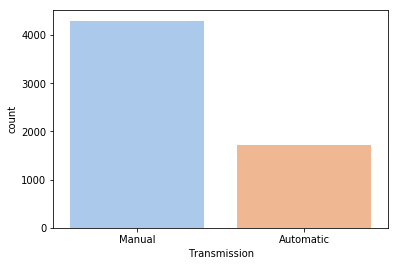

	
		Univariate Analysis of Owner_Type
-----------------------------------------------------------
4. No of unique values in Owner_Type are: 4. 
The distribution is as follows:
Owner_Type
First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64



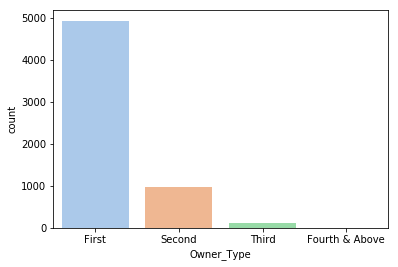

	
		Univariate Analysis of Seats
-----------------------------------------------------------
5. No of unique values in Seats are: 9. 
The distribution is as follows:
Seats
5.00     5014
7.00      674
8.00      134
4.00       99
6.00       31
2.00       16
10.00       5
9.00        3
0.00        1
Name: Seats, dtype: int64



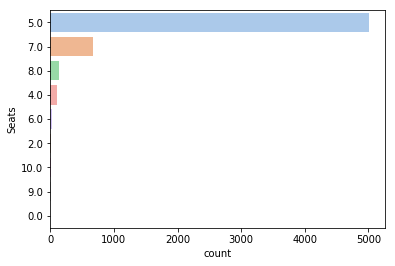

	
		Univariate Analysis of Year_converted
-----------------------------------------------------------
6. No of unique values in Year_converted are: 22. 
The distribution is as follows:
Year_converted
2014    797
2015    744
2016    741
2013    649
2017    587
2012    580
2011    466
2010    342
2018    298
2009    198
2008    174
2007    125
2019    102
2006     78
2005     57
2004     31
2003     17
2002     15
2001      8
1998      4
2000      4
1999      2
Name: Year_converted, dtype: int64



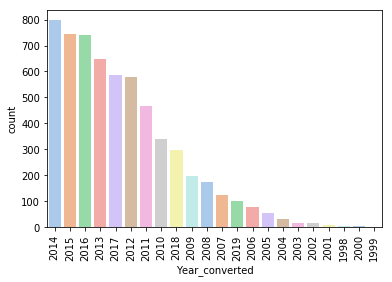

	
		Univariate Analysis of Brand
-----------------------------------------------------------
7. No of unique values in Brand are: 31. 
The distribution is as follows:
Brand
Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Bentley             1
Lamborghini         1
Ambassador          1
Smart               1
Isuzu               1
Name: Brand, dtype: int64



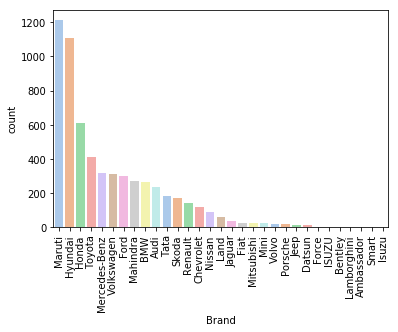

In [59]:
for i,x in enumerate(categorical):
    if x not in ['Model']:
        univariate_analysis_categorical(x, i)  


In [60]:
fig = px.bar(title = 'Car Brands and Models',x =train_data['Brand'].str.strip(), color = train_data['Model'].str.strip(), barmode = 'overlay',opacity=0.5, width =1000, height = 500)
fig.show()

In [61]:
print(round(train_data[(train_data['Brand']=='Hyundai') | 
            (train_data['Brand']=='Maruti') 
           ].shape[0]/6019*100,2), "% of market is owned by Hyundai and Maruti")

38.51 % of market is owned by Hyundai and Maruti


In [62]:
print(round(train_data[(train_data['Seats']==5) & 
           (train_data['Transmission']=='Manual') & 
           ((train_data['Fuel_Type']=='Petrol') | (train_data['Fuel_Type']=='Diesel')) &
           ((train_data['Owner_Type']=='First'))
           ].shape[0]/train_data.shape[0]*100,2), "% of cars Manual Transmission cars run either on diesel or petrol and are first hand owned 5 seaters")

48.4 % of cars Manual Transmission cars run either on diesel or petrol and are first hand owned 5 seaters


## **Observations**
From the above plots, we've tried to analyse each of our categorical variables individually. In other words, we've tried to see how the number of cars are distributed in each of the following categories - Location, Fuel_Type, Transmission, Owner_Type, Year, Brand, Model.



*   We can see that most number of cars are sold in Mumbai(\~780), followed by Hyderabad and Kochi and the Least number of cars were sold in Ahmedabad(\~210).
*   Diesel cars are the most frequently encountered cars followed closely by Petrol. CNG, LPG and Electric are very less in number.
*   Majority of the cars(\~4000) are Manual while the others are Automatic.
*   As far as ownership is considered, First owned cars predominate our dataset, followed by second, third and fourth and above.
*   The highest number of sold were manufactured in 2014, followed by 2015 and 2016 while the number of cars manufactured from 1998 to end of 2001 seems to sold very less.
*   Cars from 31 different car manufacturers are found in our data, with Maruti being the highest in number.
*   More than 83% of cars are 5 seaters.

*   **From the above, we can infer that Maruti and Hyundai rule over 40% of this competitive market**
*   **First hand owned Manual Transmission cars which run on diesel or petrol and are 5 seaters are favoured by the customers - more than 48% of the cars fall under this category.**


### **Analyzing the Continuous(numerical) Variables**

Let's check for outliers in our numerical variables

In [69]:
plt.figure(figsize=(5,5))
train_data[numerical].boxplot(vert=0)
plt.title('Outliers',fontsize=16)
plt.show()

In [70]:
train_data[numerical].max().sort_values()

Mileage_converted          60.37
Price                     160.00
New_Price_converted       230.00
Power                     560.00
Year                     2019.00
Engine_converted         5998.00
Kilometers_Driven     6500000.00
dtype: float64

As kilometers driven has high magnitude, we'll not consider the variable so that we can observe other variables, which are in a similar scale

In [71]:
plt.figure(figsize=(5,5))
train_data[numerical].drop(['Kilometers_Driven'], axis=1).boxplot(vert=0)
plt.title('Outliers excluding Kilometers Driven',fontsize=16)
plt.show()

Although we can see that outliers exist, we cannot quantify them clearly due to difference in the scales of variables and difference in the magnitude of outliers. Let's try to quantify them below:

In [72]:
# Number of outliers
def outlier_check(data,n):
    for col in data.columns:
        if data[col].dtype == 'int64' or data[col].dtype == 'float64':
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_range= Q1-(n * IQR)
            upper_range= Q3+(n * IQR)
            print(f"{style.BOLD}{col}{style.END}")
            print("Number of outliers:",data[(data[col] > upper_range) | (data[col] < lower_range)].shape[0])
            print("Percentage of outliers:{0:10.3f}".format(((data[(data[col] > upper_range) | (data[col] < lower_range)].shape[0])/data.shape[0])*100),"%\n")

In [73]:
outlier_check(train_data, 1.5)

Year
Number of outliers: 50
Percentage of outliers:     0.831 %

Kilometers_Driven
Number of outliers: 202
Percentage of outliers:     3.356 %

Power
Number of outliers: 238
Percentage of outliers:     3.954 %

Seats
Number of outliers: 963
Percentage of outliers:    15.999 %

Price
Number of outliers: 718
Percentage of outliers:    11.929 %

Engine_converted
Number of outliers: 61
Percentage of outliers:     1.013 %

Mileage_converted
Number of outliers: 125
Percentage of outliers:     2.077 %

New_Price_converted
Number of outliers: 1
Percentage of outliers:     0.017 %



###**Observations:**

*   Outliers are present in almost all the columns. 
*   We need to treat these columns appropriately so that we can build reliable models

# **Bivariate Analysis:**

###Now, let's begin Bi-variate Analysis. Here, we analyse 2 variables trying to find any relation between them

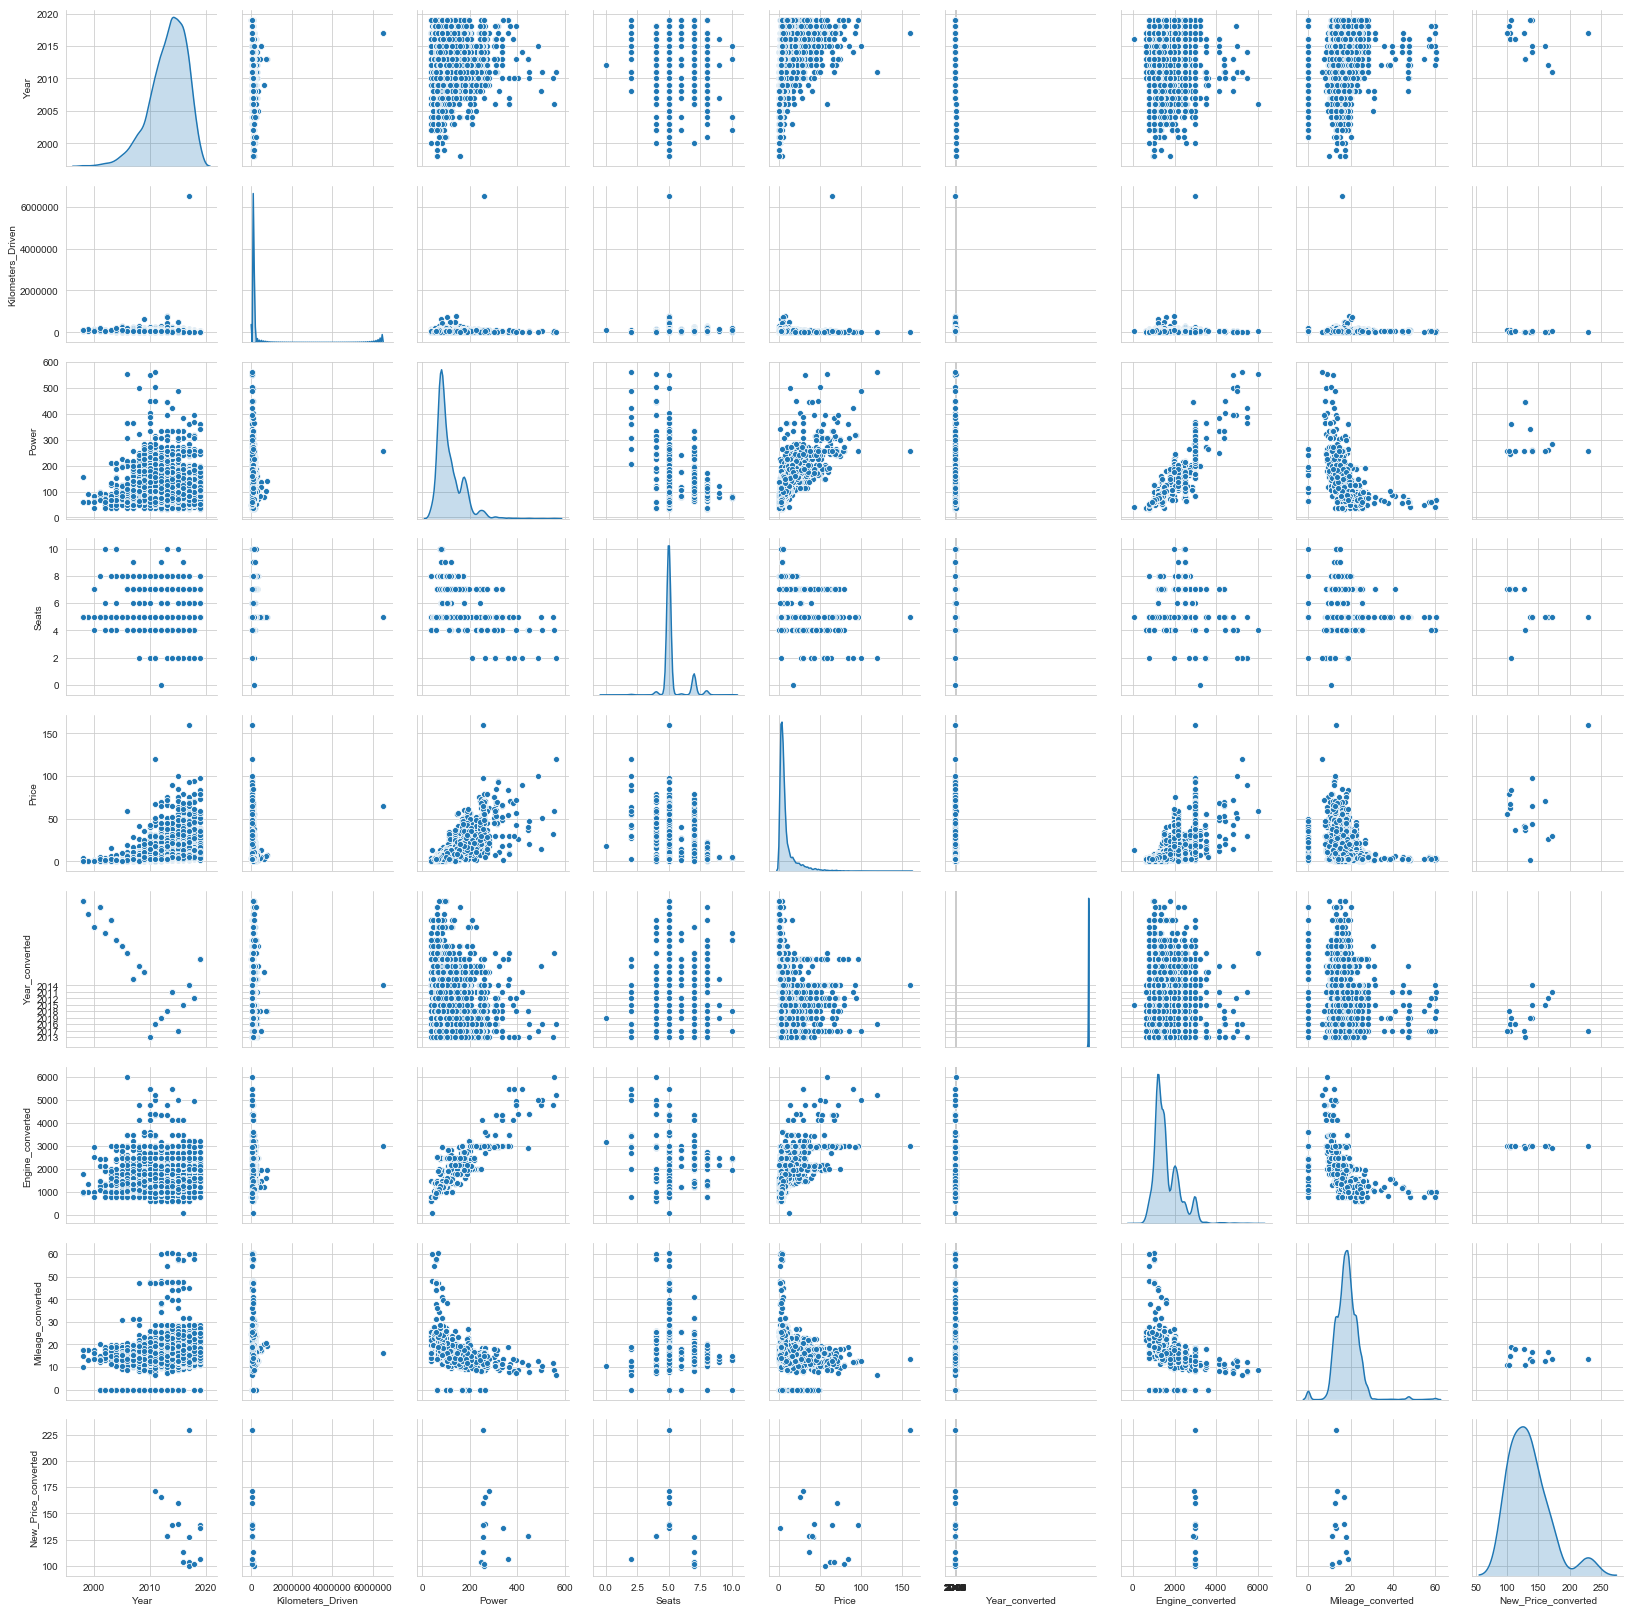

In [75]:
sns.set_style("whitegrid")
sns.pairplot(data=train_data,diag_kind="kde",)
plt.show()

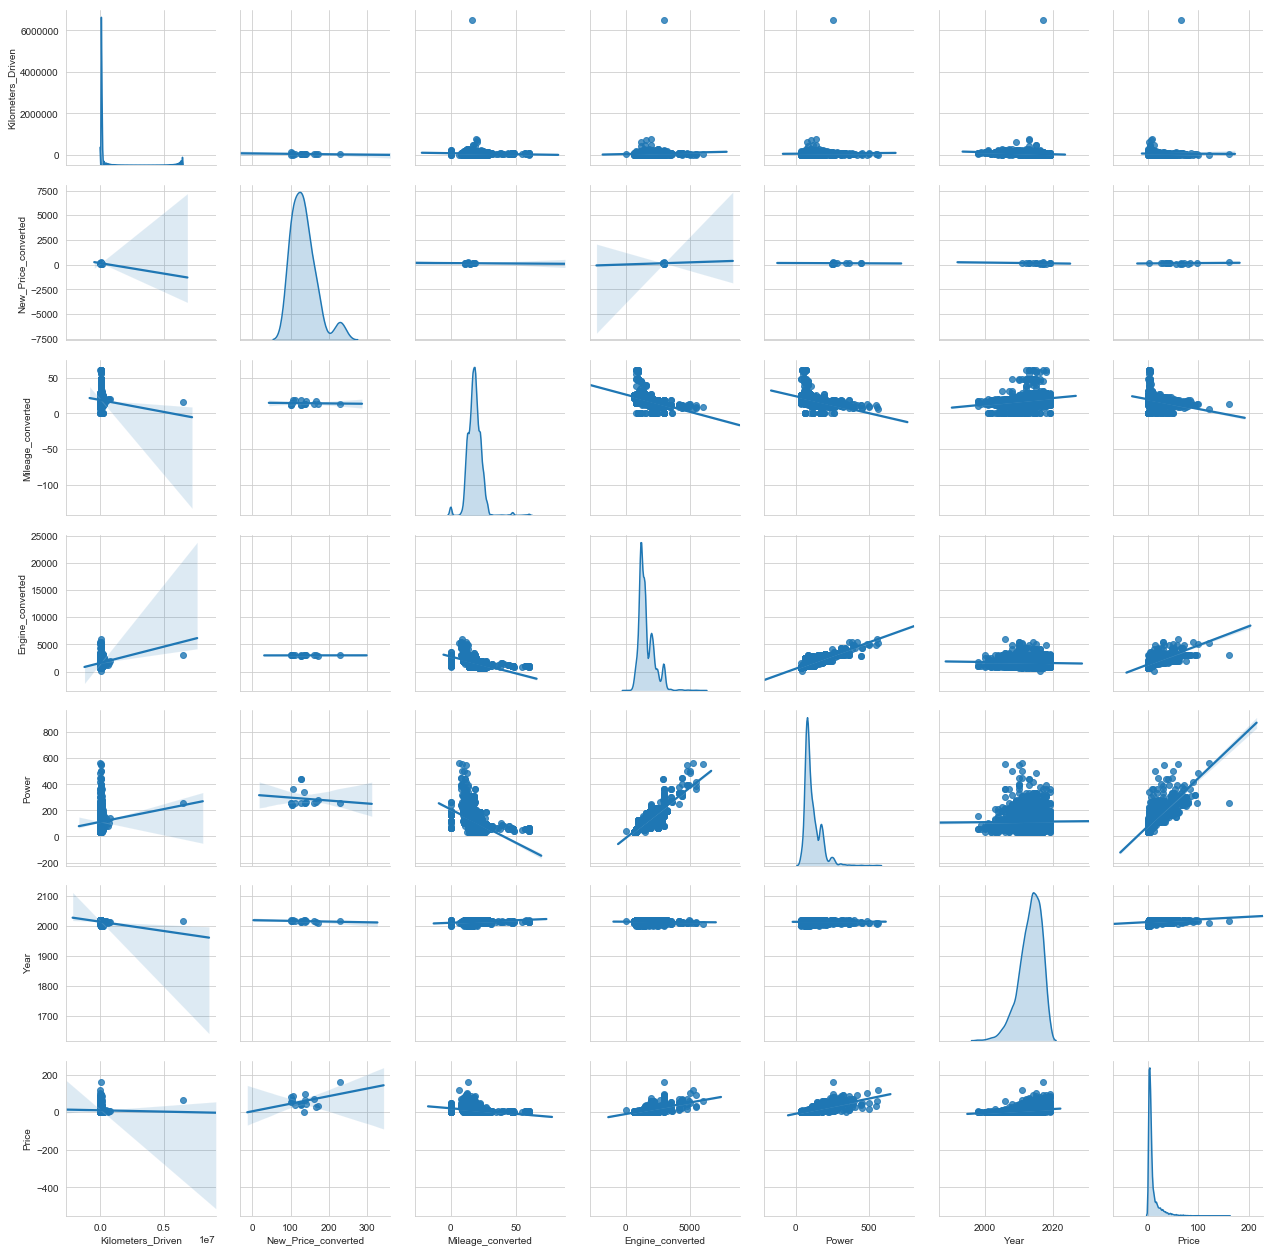

In [77]:
#Let's add a regression line to the above graph to get a better picture
sns.pairplot(data = train_data[numerical], kind='reg', diag_kind = 'kde')

### **Observations**

*   Based on the regression lines in the above graphs, we may conclude that the following paris of variables exhibit faint to considerable amounts of correlation
1. Price and New Price
2. Price and Mileage
3. Price and Engine
4. Price and Year
5. Price and Power
6. Power and Engine
7. Mileage and Engine
8. Engine and New Price


*    Although we can say that there exists some relationship between variables, we can't tell quantify that from the above graphs. 
*    So, let's quantify the amounts of correlation using Pearson Correlation and verify the above observations



In [78]:
plt.figure(figsize=(7,7))
sns.heatmap(train_data.corr(),annot=True)

##### **Observations:** 

* There is high positive correlation between Price - our dependant variable and ew Price, Power, Engine .
* High positive relation among New_Price_converted, Engine, Power. This suggests the presence of Multicolinearity among these variables.
* Slightly negative corelation can be seen between Mileage and price, Mileage and Power




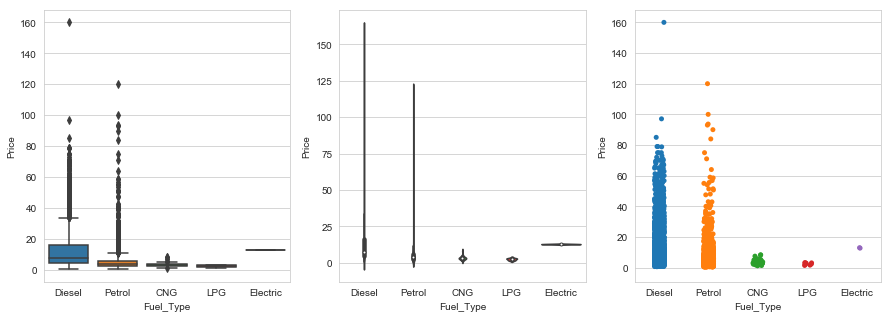

In [79]:
x = 'Fuel_Type'
y = 'Price'
order=train_data[x].value_counts().index
plt.figure(figsize= (15,5))
plt.subplot(1,3,1)
sns.boxplot(x=train_data[x], y=train_data[y], data=train_data, order=order)
plt.subplot(1,3,2)
sns.violinplot(x=train_data[x], y=train_data[y], data=train_data, order=order)
plt.subplot(1,3,3)
sns.stripplot(x=train_data[x], y=train_data[y], data=train_data, order=order)

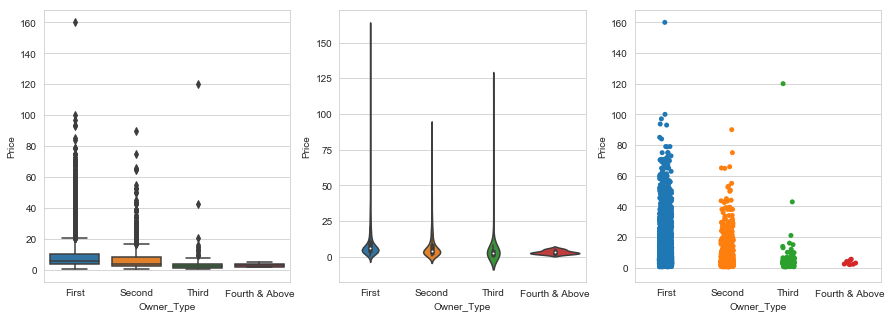

In [80]:
x = 'Owner_Type'
y = 'Price'
order=train_data[x].value_counts().index
plt.figure(figsize= (15,5))
plt.subplot(1,3,1)
sns.boxplot(x=train_data[x], y=train_data[y], data=train_data, order=order)
plt.subplot(1,3,2)
sns.violinplot(x=train_data[x], y=train_data[y], data=train_data, order=order)
plt.subplot(1,3,3)
sns.stripplot(x=train_data[x], y=train_data[y], data=train_data, order=order)

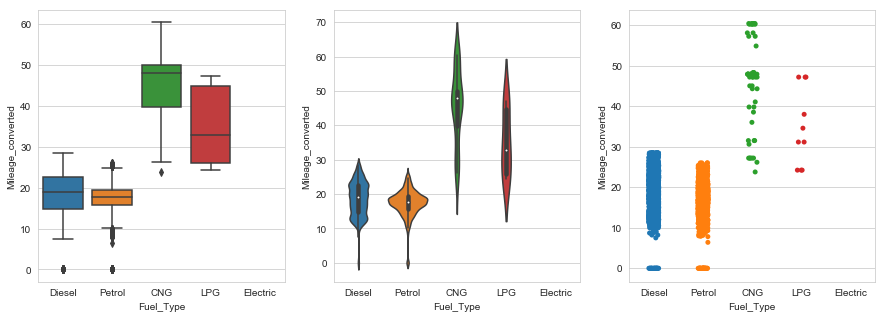

In [81]:
x = 'Fuel_Type'
y = 'Mileage_converted'
order=train_data[x].value_counts().index
plt.figure(figsize= (15,5))
plt.subplot(1,3,1)
sns.boxplot(x=train_data[x], y=train_data[y], data=train_data, order=order)
plt.subplot(1,3,2)
sns.violinplot(x=train_data[x], y=train_data[y], data=train_data, order=order)
plt.subplot(1,3,3)
sns.stripplot(x=train_data[x], y=train_data[y], data=train_data, order=order)

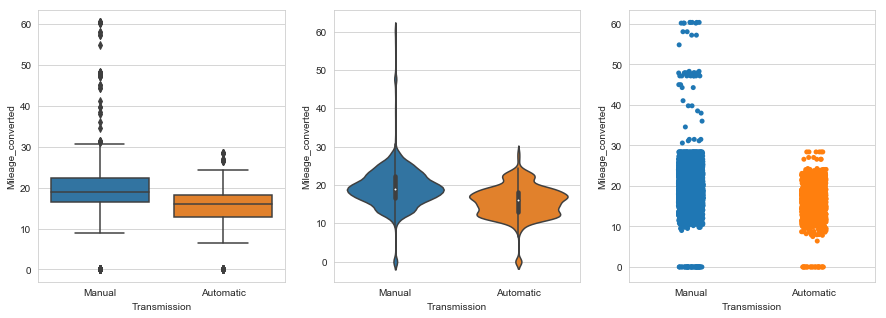

In [82]:
x = 'Transmission'
y = 'Mileage_converted'
order=train_data[x].value_counts().index
plt.figure(figsize= (15,5))
plt.subplot(1,3,1)
sns.boxplot(x=train_data[x], y=train_data[y], data=train_data, order=order)
plt.subplot(1,3,2)
sns.violinplot(x=train_data[x], y=train_data[y], data=train_data, order=order)
plt.subplot(1,3,3)
sns.stripplot(x=train_data[x], y=train_data[y], data=train_data, order=order)

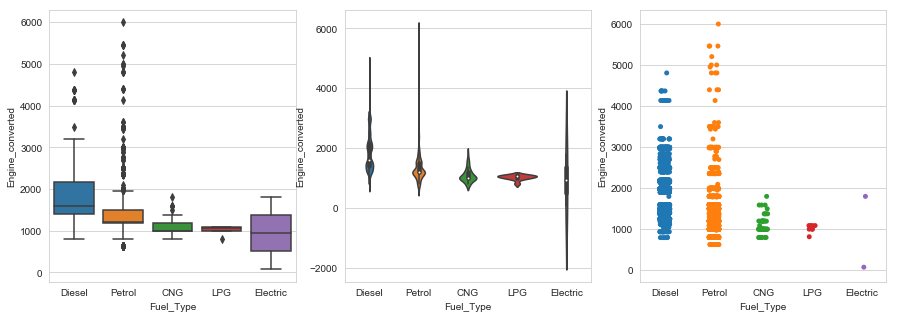

In [83]:
x = 'Fuel_Type'
y = 'Engine_converted'
order=train_data[x].value_counts().index
plt.figure(figsize= (15,5))
plt.subplot(1,3,1)
sns.boxplot(x=train_data[x], y=train_data[y], data=train_data, order=order)
plt.subplot(1,3,2)
sns.violinplot(x=train_data[x], y=train_data[y], data=train_data, order=order)
plt.subplot(1,3,3)
sns.stripplot(x=train_data[x], y=train_data[y], data=train_data, order=order)

In [84]:
x = 'Seats'
y = 'Price'
order=train_data[x].value_counts().index
plt.figure(figsize= (15,5))
plt.subplot(1,3,1)
sns.boxplot(x=train_data[x], y=train_data[y], data=train_data, order=order)
plt.subplot(1,3,2)
sns.violinplot(x=train_data[x], y=train_data[y], data=train_data, order=order)
plt.subplot(1,3,3)
sns.stripplot(x=train_data[x], y=train_data[y], data=train_data, order=order)

In [86]:
x = 'Brand'
y = 'Engine_converted'
order=train_data.groupby(x)[y].mean().sort_values(ascending=False).index
plt.figure(figsize= (15,5))
sns.barplot(x=train_data[x], y=train_data[y], data=train_data, order=order)
plt.xticks(rotation=70);


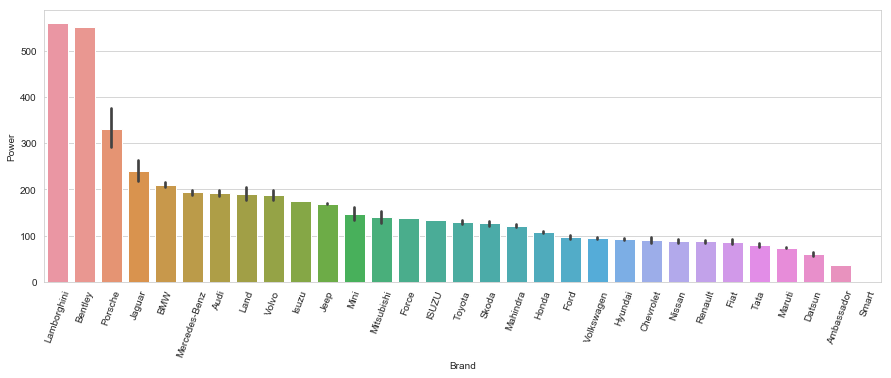

In [87]:
x = 'Brand'
y = 'Power'
order=order=train_data.groupby(x)[y].mean().sort_values(ascending=False).index
plt.figure(figsize= (15,5))
sns.barplot(x=train_data[x], y=train_data[y], data=train_data, order=order)
plt.xticks(rotation=70);

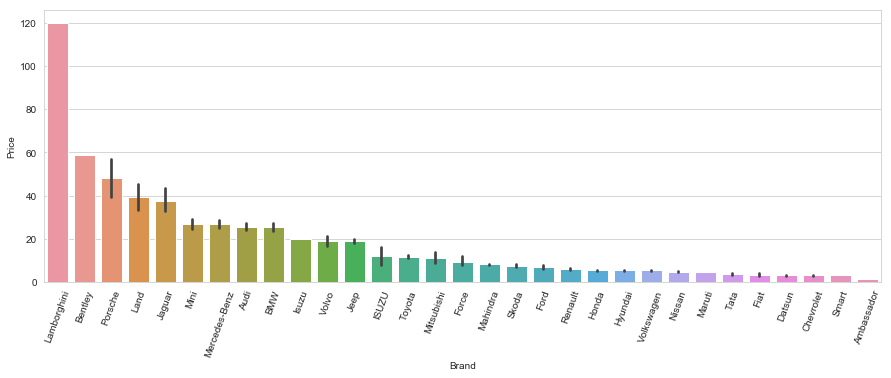

In [88]:
x = 'Brand'
y = 'Price'
order=order=train_data.groupby(x)[y].mean().sort_values(ascending=False).index
plt.figure(figsize= (15,5))
sns.barplot(x=train_data[x], y=train_data[y], data=train_data, order=order)
plt.xticks(rotation=70);

###**Observations**
*    Diesel cars have the highest average price while CNG and LPG have the least. But the mileage is observed to be the highest among the CNG and LPG fuel types.
*    Automatic transmission cars are highly expensive in comparison to Manual transmission, although they provide lesser mileage
*    As the ownership moves from first to second to third and beyond, the price is also falling down, which is expected naturally.
*    Although very less in number, average price of 2 seater cars is the highest of all. 
* The engine size (CC) and Power of Lamborghini, Bently and Porsche are higher and we can see that price of these cars are highest as well. We can conclude that Price of car is related with engine size and Power.

# **Multivariate Analysis**

Here, we examine any possible corelation between more than 2 varables

In [89]:
train_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Brand', 'Model', 'Year_converted',
       'Engine_converted', 'Mileage_converted', 'New_Price_converted'],
      dtype='object')

In [90]:
f = sns.factorplot(x= "Seats",y = "Price", col= "Owner_Type", col_wrap=4, data=train_data, kind="box",ci= False,palette='bright',aspect=1, )
f.fig.set_size_inches(15,8)

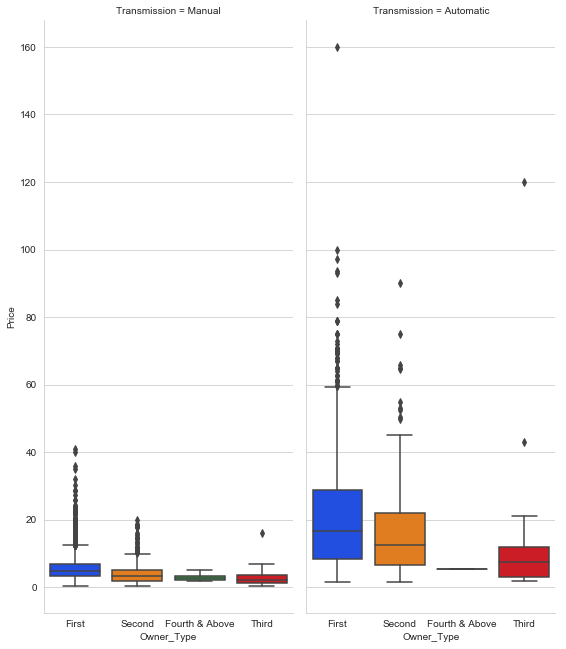

In [91]:
f = sns.factorplot(x= "Owner_Type",y = "Price", col= "Transmission", col_wrap=4, data=train_data, kind="box",ci= False,palette='bright',aspect=1, )
f.fig.set_size_inches(15,10)

###**Observation:** 

1.   Two-seater car with First hand owner have higher price than second hand owner. This is natural trend. 
2.   Two seater cars have significatly higher price than those of other. There must be other factor involved such as mileage, engine, power which is causing this trend. 



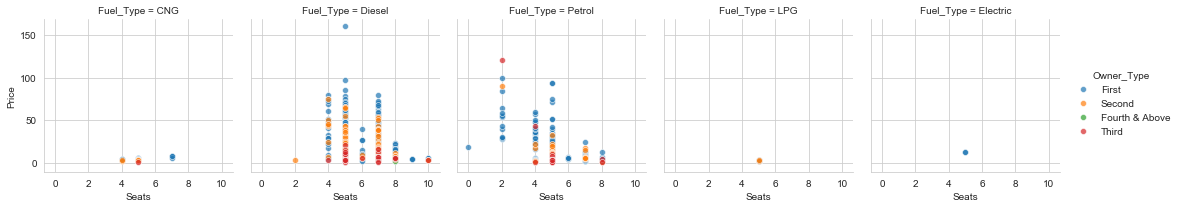

In [92]:
g = sns.FacetGrid(train_data, col="Fuel_Type", hue="Owner_Type")
g.map(sns.scatterplot, "Seats", "Price", alpha=.7)
g.add_legend()

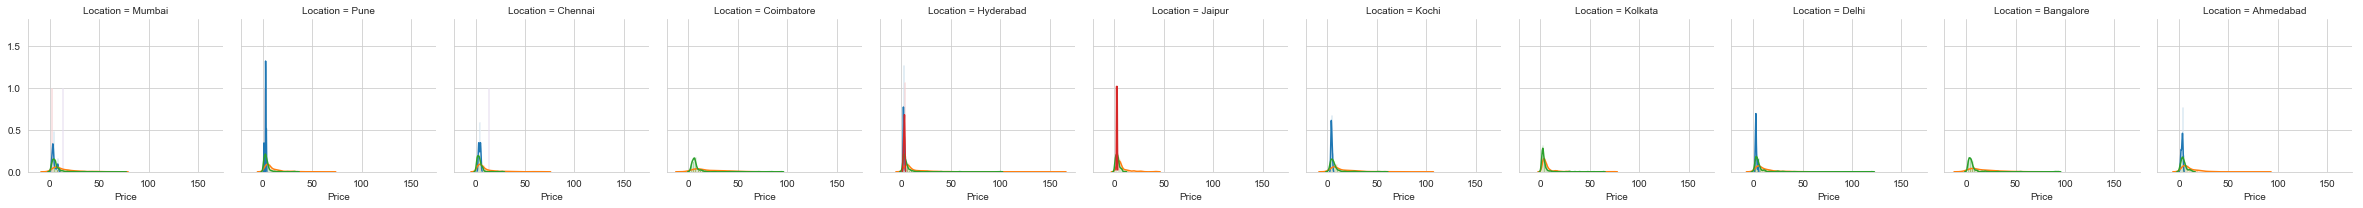

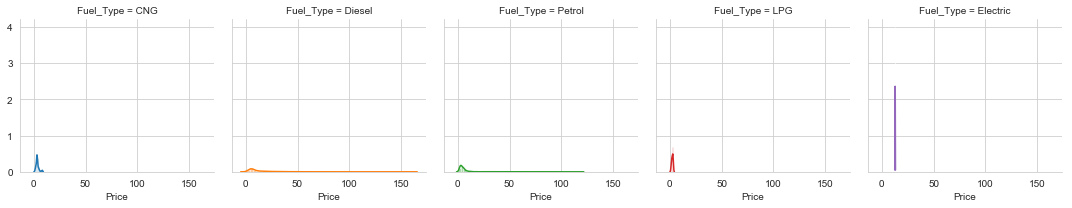

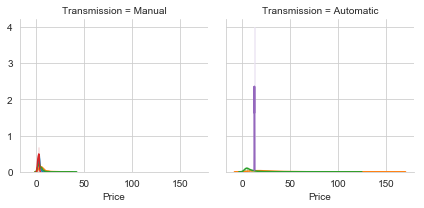

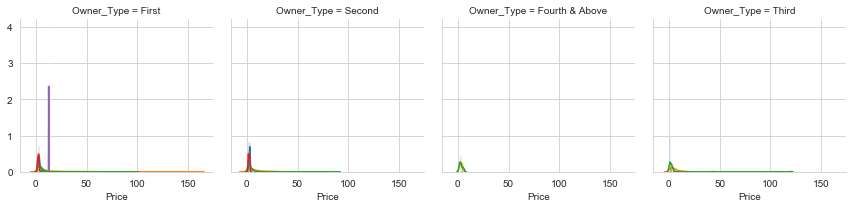

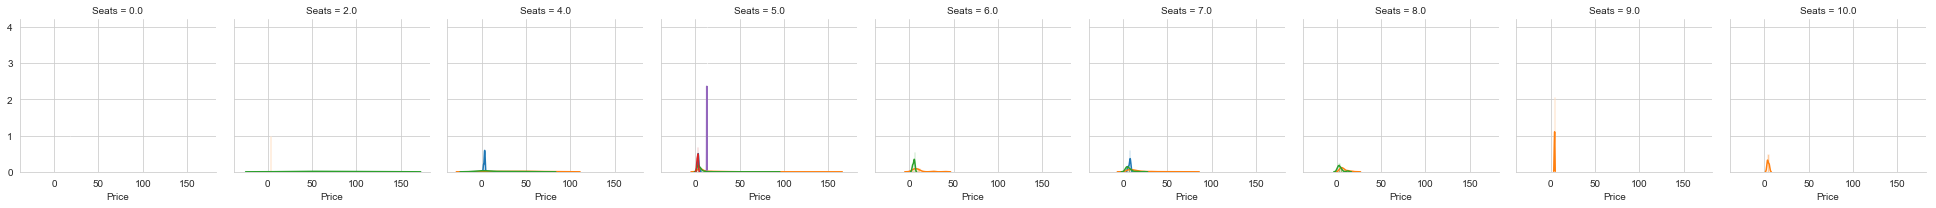

In [94]:
for col in ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats']:
    g = sns.FacetGrid(train_data, col=col, hue = 'Fuel_Type')
    g.map(sns.distplot, "Price");

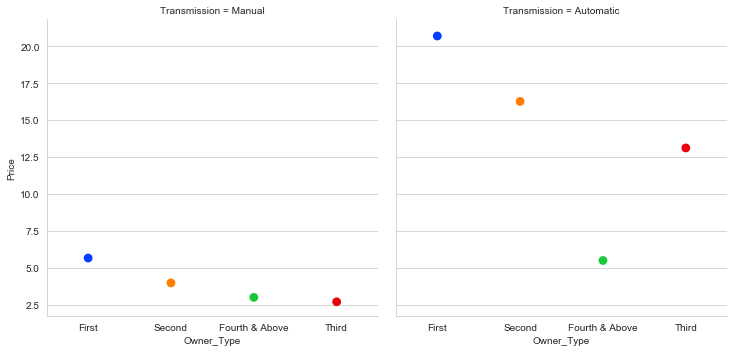

In [95]:
sns.factorplot(x= "Owner_Type",y = "Price",col= "Transmission",col_wrap=4, data=train_data,kind="point", join = True,ci= False,palette='bright',aspect=1,)

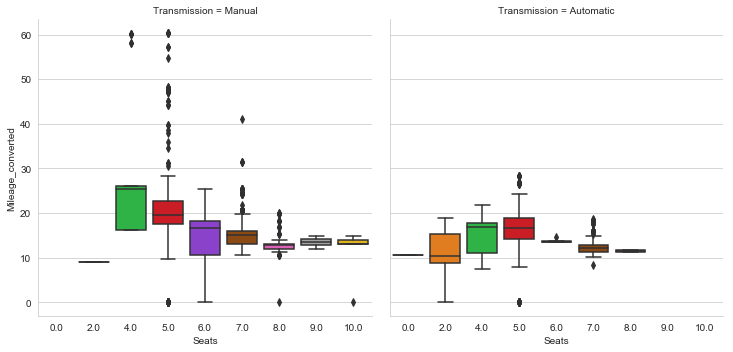

In [96]:
sns.factorplot(x= "Seats",y = "Mileage_converted",col= "Transmission",col_wrap=4, data=train_data,kind="box", ci= False,palette='bright',aspect=1,)

In [97]:
train_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Brand', 'Model', 'Year_converted',
       'Engine_converted', 'Mileage_converted', 'New_Price_converted'],
      dtype='object')

In [98]:
pd.crosstab(train_data.Fuel_Type, train_data.Transmission, margins = True, values=train_data.Price, aggfunc='mean')

Transmission  Automatic  Manual   All
Fuel_Type                            
CNG                 NaN    3.52  3.52
Diesel            24.58    6.64 12.84
Electric          12.88     NaN 12.88
LPG                 NaN    2.49  2.49
Petrol            11.26    4.11  5.70
All               19.84    5.33  9.48

In [99]:
pd.crosstab(train_data.Owner_Type, train_data.Transmission, margins = True, values=train_data.Price, aggfunc='mean')

Transmission    Automatic  Manual  All
Owner_Type                            
First               20.70    5.67 9.96
Fourth & Above       5.50    3.00 3.28
Second              16.27    3.98 7.60
Third               13.12    2.70 5.01
All                 19.84    5.33 9.48

# **Observations**    
*    Average price of two seaters seems to be higher than the others
Automatic Transmission cars are costlier than Manual cars.
*    Median 4 seated car's price vastly differs between first owned and second owned.
*    Even average cost of a Third owned Automatic car is higher than the Manual transmission First owned car. 
*    4 and 5 seaters cars are preferred among others 
*    In general, Automatic cars are costlier than Manual. 



# **Observations**

*   Although it projected many observations similar to that of ours, it didn't deal well with data columns that needed preprocessing - like Mileage which had measurement units also in it's value
*   We might be able to make it better by providing preprocessed data. But for now, let's not go deeper into automation.

# **Data Pre-Processing**

From the above EDA, we can understand that Mileage, Engine and New_Price are continuous variable, hence dropping these column and keeping the Mileage_converted, Engine_converted, New_Price_converted. Also Year are better to be considered as categorical variable, hence dropping Year and keeping Year_converted. We will create of copy of existing dataset with keeping all the mentioned changes in mind.

In [100]:
# Creating a copy of original dataframe
data_new=train_data.copy()
print("Shape of data before dropping the columns",data_new.shape)
data_new.drop(['Year','Mileage','Engine','New_Price'],axis=1,inplace=True)
print("Shape of data after before dropping the columns",data_new.shape)

Shape of data before dropping the columns (6019, 19)
Shape of data after before dropping the columns (6019, 15)


In [101]:
# Checking if duplicate values present in dataset
data_new.duplicated().sum()

0

There is no duplicate value present in dataset. Lets try to understand the missing value.

##**Checking for incorrect values**

In [102]:
#we have seen that the minimum value of Seats and Mileage_converted is 0.0 which seems unusual
#we will check the dataset for 0 value
data_new[(data_new['Seats']==0)|(data_new['Mileage_converted']==0)].shape

(69, 15)

#### **Observation:** There are total of 69 rows, which contain 0 value either in Seats coulmn or in Mileage_converted. We will impute the mode value based on brands, for these incorrect values of Seats column. and the mean value for Mileage_converted_column

##**Handling Missing and Incorrect value**

In [103]:
# check count of null records in each column
data_new.isnull().sum()

Name                      0
Location                  0
Kilometers_Driven         0
Fuel_Type                 0
Transmission              0
Owner_Type                0
Power                   143
Seats                    42
Price                     0
Brand                     0
Model                     0
Year_converted            0
Engine_converted         36
Mileage_converted         2
New_Price_converted    6002
dtype: int64

In [104]:
#rounding the percentage to 2 digits
round((data_new.isnull().sum()/data_new.shape[0])*100,2)

Name                   0.00
Location               0.00
Kilometers_Driven      0.00
Fuel_Type              0.00
Transmission           0.00
Owner_Type             0.00
Power                  2.38
Seats                  0.70
Price                  0.00
Brand                  0.00
Model                  0.00
Year_converted         0.00
Engine_converted       0.60
Mileage_converted      0.03
New_Price_converted   99.72
dtype: float64

### **Observation:**

1. The missing value in New_Price_converted is quite high, about 86.31% values are missing. This could be because of the new model of the car may no longer be manufactured, hence they do not have New Price value. Therefore we will drop this column.
2. There are 143 missing values in the Power column which account for 2.38% of missing values, 36 missing values in Engine_converted column which account of 0.60% of missing value, 42 missing value in Seats, which is 0.70% , and 2 missing value in Mileage converted column which is 0.03% of missing value in the dataset.
3. Since there is relationship between Engine ,Power and Seats between Brands of car. Hence we will impute the value of Engine_converted and Power based on the mean value of respective brands. The missing value of Seats column will be imputed based on the mode value of respective brands.
4. The missing value of Mileage_converted is very few, thus we are imputing the mean value of whole Mileage_converted columns.




In [105]:
data_new.drop(['New_Price_converted'],axis=1,inplace=True)
print("Shape of dataset after dropping the New_Price_converted column is:", data_new.shape)

Shape of dataset after dropping the New_Price_converted column is: (6019, 14)


In [115]:
class ImputeNumerical(TransformerMixin):
    def __init__(self, *cols):
        self.cols = cols
        self.target = cols[0][0]
        self.related_columns = self.cols[0][1:-1]
        self.method = self.cols[0][-1].lower()

  
    def transform(self, df):
        target = self.target
        related_columns = self.related_columns
        df[target]=df[target].replace(0.0,np.nan)
        df[target] = df[target].fillna(df.groupby(related_columns)[target].transform(self.method))
        while df[target].isnull().sum()!=0  and len(related_columns)>2:
            related_columns = related_columns[:-1]
            df[target] = df[target].fillna(round(df.groupby(related_columns[:-1])[target].transform(self.method)))
      
        if df[target].isnull().sum()!=0:
            df[target].fillna(round(df[target].mean()) ,inplace = True)
        return df
    
    def fit(self, *_):
        return self

In [119]:
class ImputeUsingMode(TransformerMixin):
    def __init__(self, *cols):
        self.cols = cols
        self.target = cols[0][0]
        self.related_columns = self.cols[0][1:-1]

    def transform(self, df):
        target = self.target
        related_columns = self.related_columns
        df[target]=df[target].replace(0.0,np.nan)
        df[target] = df[target].fillna(df.groupby(related_columns)[target].transform( lambda x: x.fillna(x.mode())) )
        while df[target].isnull().sum()!=0  and len(related_columns)>2:
            related_columns = related_columns[:-1]
            df[target] = df[target].fillna(df.groupby(related_columns)[target].transform( lambda x: x.fillna(x.mode())) )
        if df[target].isnull().sum()!=0:
            df[target].fillna(round(df[target].mode()) ,inplace = True)
    # print(df)
        return df

    def fit(self, *_):
        return self

In [124]:
imputation_pipe = Pipeline([
    ('Mileage', ImputeNumerical(['Mileage_converted', 'Brand', 'Model', 'mean'])),
    ('Power', ImputeNumerical(['Power', 'Engine_converted', 'Brand', 'Model', 'mean'])),
    ('Engine', ImputeNumerical(['Engine_converted', 'Brand', 'Model', 'mean']))
    # ('Seats', ImputeUsingMode(['Seats', 'Brand', 'Model']))
    ])

In [125]:
# train_data = train_data_master.copy()
data_new['Brand'] = data_new['Name'].apply(get_brand)
data_new['Model'] = data_new['Name'].apply(get_model)
data_new['Seats']=data_new['Seats'].replace(0.0, np.nan)

In [126]:
def impute_Seats(seat):
    for i in range(data_new.shape[0]):
        if pd.isnull(data_new.at[i,'Seats']):
            b=data_new.at[i,'Brand']
            data_new.at[i,'Seats']=seat[seat['Brand']==b]['Seats']



In [127]:
imputation_pipe.fit_transform(data_new)
seat=data_new.groupby('Brand').agg(pd.Series.mode)['Seats'].reset_index()
impute_Seats(seat)

In [128]:
data_new['Seats']=data_new['Seats'].replace(0.0,np.nan)
impute_Seats(seat)
print("The number of data having 0 value")
print(data_new[(data_new['Seats']==0)|(data_new['Mileage_converted']==0)].shape[0])

The number of data having 0 value
0


In [ ]:
# impute_Seats(seat)
# data_new['Mileage_converted'].fillna(data_new['Mileage_converted'].mean(),inplace = True)  

We have imputed the mean of the mileage value since it has no correlation with other feature. Now lets check the outliers in our dataset.

##**Outlier treatment**

In [129]:
data_outlier=data_new.copy()

In [130]:
# Defining a funtion to remove outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [131]:
#capping and flooring of outliers with upper and lower bounds respectively
for column in data_outlier.drop(['Price','Seats'],axis=1).columns:
    if data_outlier[column].dtype != 'object':
        lr,ur=remove_outlier(data_outlier[column])
        data_outlier[column]=np.where(data_outlier[column]>ur,ur,data_outlier[column])
        data_outlier[column]=np.where(data_outlier[column]<lr,lr,data_outlier[column])

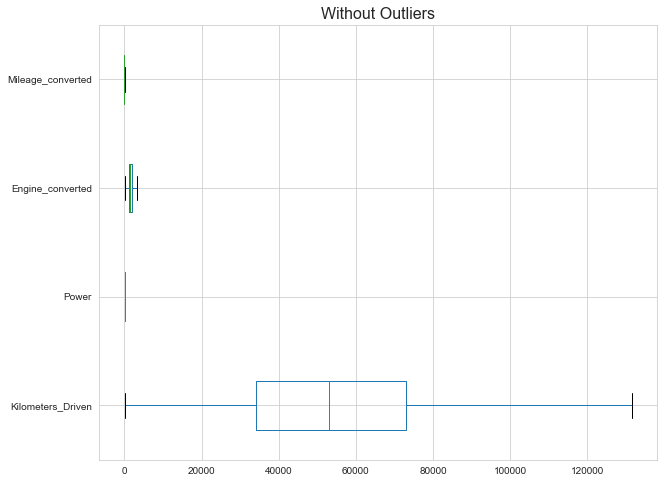

In [132]:
#plotting boxplots after outlier treatment
plt.figure(figsize=(10,8))
plt.title('Without Outliers',fontsize=16)
data_outlier.drop(['Price','Seats'],axis=1).boxplot(vert=0)

### **Feature Engineering**

We will split the train and test data before transforming , so that there will not be problem of data leakage. Our model will be trained on training dataset only.

In [133]:
#copying the outlier treated dataframe into new variable
data_feature = data_outlier.copy()

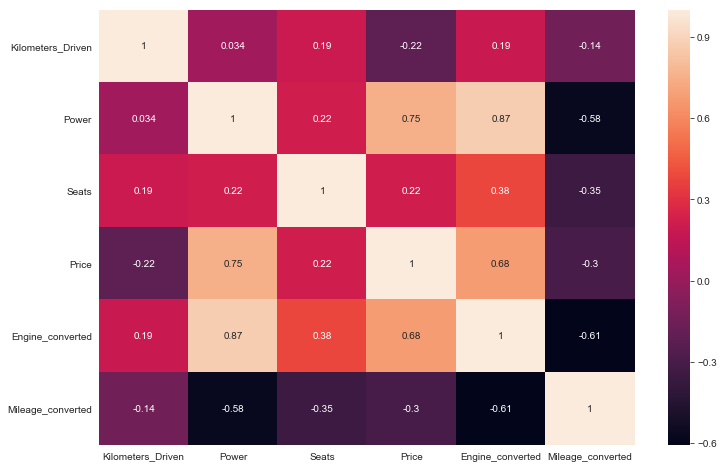

In [134]:
#checking correlation plot for multi collinearity check
plt.figure(figsize=(12,8))
sns.heatmap(data_feature.corr(method='spearman'),annot=True)

There is high correlation between Power and engine, hence we can drop Power from our dataset.

In [135]:
data_feature.drop(['Power'], axis=1, inplace=True)
print("Shape of data after removing Power",data_feature.shape)

Shape of data after removing Power (6019, 13)
